In [1]:
from utils.funcs import Adj2EdgeList
import networkx as nx

A_unnorm = nx.adjacency_matrix(nx.erdos_renyi_graph(400,  3.8/400, seed=42))
A = Adj2EdgeList(A_unnorm) # edge index


In [1]:
# 初始化 MyWAT，测试
from models.MyWAT import MyWAT
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

model = MyWAT(N=400,input_time_steps=128,K=16,L=32).cuda()
dummy_input = torch.randn(32, 400, 128).cuda()
target = torch.randn(32, 400, 32).cuda()
# 假设你的模型有一个损失函数
criterion = torch.nn.MSELoss()

# 创建一个优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 模拟前向传播和计算损失
output,_ = model(dummy_input)  # 模型的前向传播
loss = criterion(output, target)  # 计算损失

# 反向传播，计算梯度
loss.backward()

result = model._compute_forward_results(dummy_input)


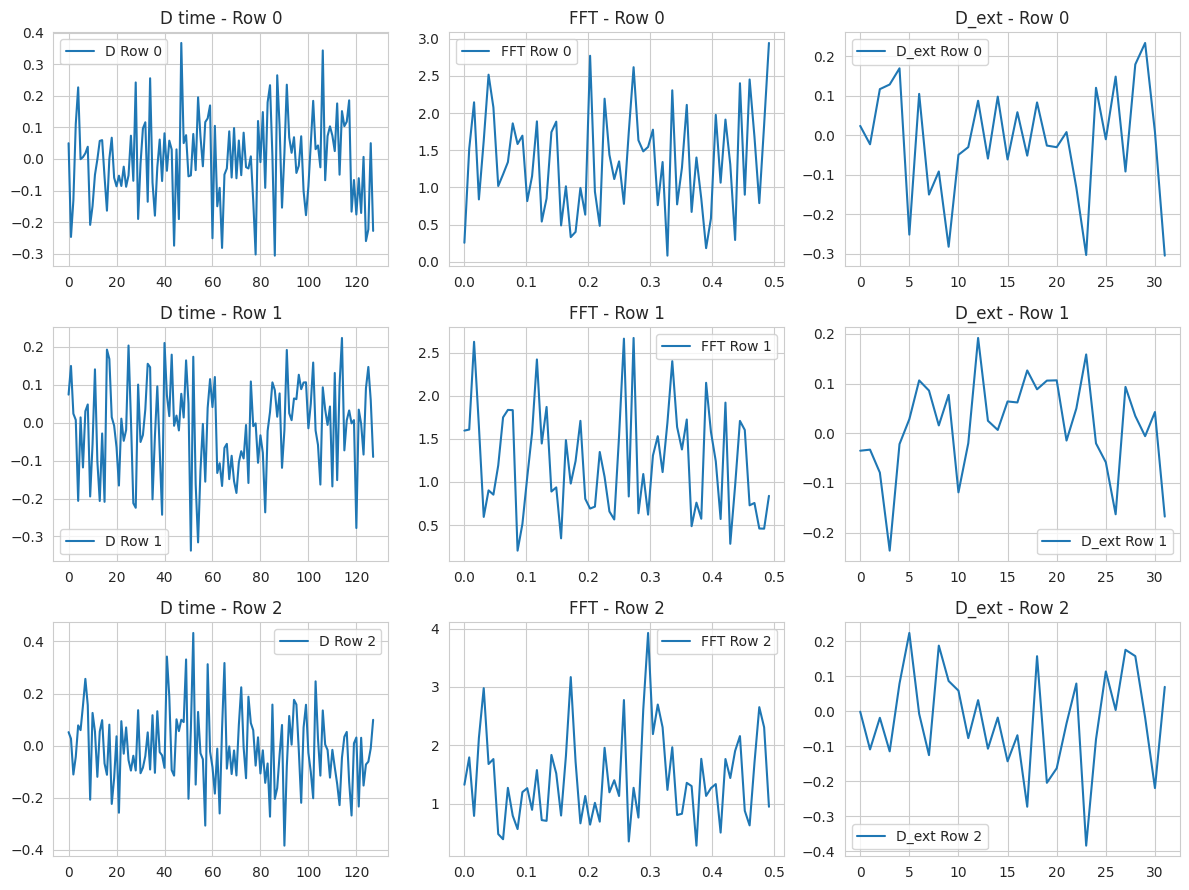

In [2]:
D, D_ext = result["D"], result["D_ext"]

# ✅ 生成第一张图（D, D_ext 的 1,5,10行）
fig_D, axes_D = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

rows_to_plot = [0, 1, 2]  # 需要绘制的行索引
for i, row in enumerate(rows_to_plot):
    axes_D[i, 0].plot(D[row, :].cpu().detach().numpy(), label=f'D Row {row}')
    axes_D[i, 0].grid(True)
    axes_D[i, 0].set_title(f'D time - Row {row}')
    axes_D[i, 0].legend()

    # 计算 FFT 变换
    time_series = D[row, :].cpu().detach().numpy()
    fft_values = np.fft.fft(time_series)  # 计算 FFT
    fft_magnitudes = np.abs(fft_values)  # 计算振幅
    fft_frequencies = np.fft.fftfreq(len(time_series))  # 计算频率轴
    # 画频域信号（右列）
    axes_D[i, 1].plot(fft_frequencies[:len(fft_frequencies)//2], fft_magnitudes[:len(fft_magnitudes)//2], label=f'FFT Row {row}')
    axes_D[i, 1].grid(True)
    axes_D[i, 1].set_title(f'FFT - Row {row}')
    axes_D[i, 1].legend()

    axes_D[i, 2].plot(D_ext[row, :].cpu().detach().numpy(), label=f'D_ext Row {row}')
    axes_D[i, 2].grid(True)
    axes_D[i, 2].set_title(f'D_ext - Row {row}')
    axes_D[i, 2].legend()

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
# 初始化 MyWAT，测试
from models.MyWAT import MyWAT
import torch

model = MyWAT.load_from_checkpoint("/home/jiayin/PycharmProjects/Spatio-Temporal-Analysis-Telecom-Italia/experiments/lightning_logs/WAT_Embed_TrainExt_128_32_03241430/checkpoints/epoch=168-step=35152.ckpt")

print(model.basis_extraction.sigmoid_diff.k)
print(model.basis_extraction.sigmoid_diff.start_idx)


In [ ]:
import os
import pandas as pd
import torch
from timm.data.auto_augment import color
from torchvision.utils import save_image

im_res_path = '/home/jiayin/PycharmProjects/Spatio-Temporal-Analysis-Telecom-Italia/experiments/experiments/results'

run_id = 'WAT_NoA_OrthLoss_03251528'
file_name_C = 'C_matrix.csv'
file_name_C_pre = 'C_pre_matrix.csv'
file_name_D = 'D_matrix.csv'
file_name_D_ext = 'D_ext_matrix.csv'
file_name_A = 'A_matrix.csv'

C = pd.read_csv(os.path.join(im_res_path, run_id, file_name_C)).to_numpy()
C_pre = pd.read_csv(os.path.join(im_res_path, run_id, file_name_C_pre)).to_numpy()
D = pd.read_csv(os.path.join(im_res_path, run_id, file_name_D)).to_numpy()
D_ext = pd.read_csv(os.path.join(im_res_path, run_id, file_name_D_ext)).to_numpy()
A = pd.read_csv(os.path.join(im_res_path, run_id, file_name_A)).to_numpy()

In [ ]:
# 画 D 和 D-ext
import matplotlib.pyplot as plt

fig_D, axes_D = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))
rows_to_plot = [0, 8, 15]  # 需要绘制的行索引
for i, row in enumerate(rows_to_plot):
    axes_D[i, 0].plot(D[row, :], label=f'D Row {row}')
    axes_D[i, 0].grid(True)
    axes_D[i, 0].set_title(f'D - Row {row}')
    axes_D[i, 0].legend()

    axes_D[i, 1].plot(D_ext[row, :], label=f'D_ext Row {row}')
    axes_D[i, 1].grid(True)
    axes_D[i, 1].set_title(f'D_ext - Row {row}')
    axes_D[i, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# 画D和其fft
import numpy as np
import matplotlib.pyplot as plt

# 选择需要绘制的行索引
rows_to_plot = [0, 2, 10]

# 创建 3 行 2 列的子图
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

for i, row in enumerate(rows_to_plot):
    # 获取时序数据
    time_series = D[row, :]

    # 画时序信号（左列）
    axes[i, 0].plot(time_series, label=f'D Row {row}')
    axes[i, 0].grid(True)
    axes[i, 0].set_title(f'Time Series - Row {row}')
    axes[i, 0].legend()

    # 计算 FFT 变换
    fft_values = np.fft.fft(time_series)  # 计算 FFT
    fft_magnitudes = np.abs(fft_values)  # 计算振幅
    fft_frequencies = np.fft.fftfreq(len(time_series))  # 计算频率轴
    # 画频域信号（右列）
    axes[i, 1].plot(fft_frequencies[:len(fft_frequencies)//2], fft_magnitudes[:len(fft_magnitudes)//2], label=f'FFT Row {row}')
    axes[i, 1].grid(True)
    axes[i, 1].set_title(f'FFT - Row {row}')
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

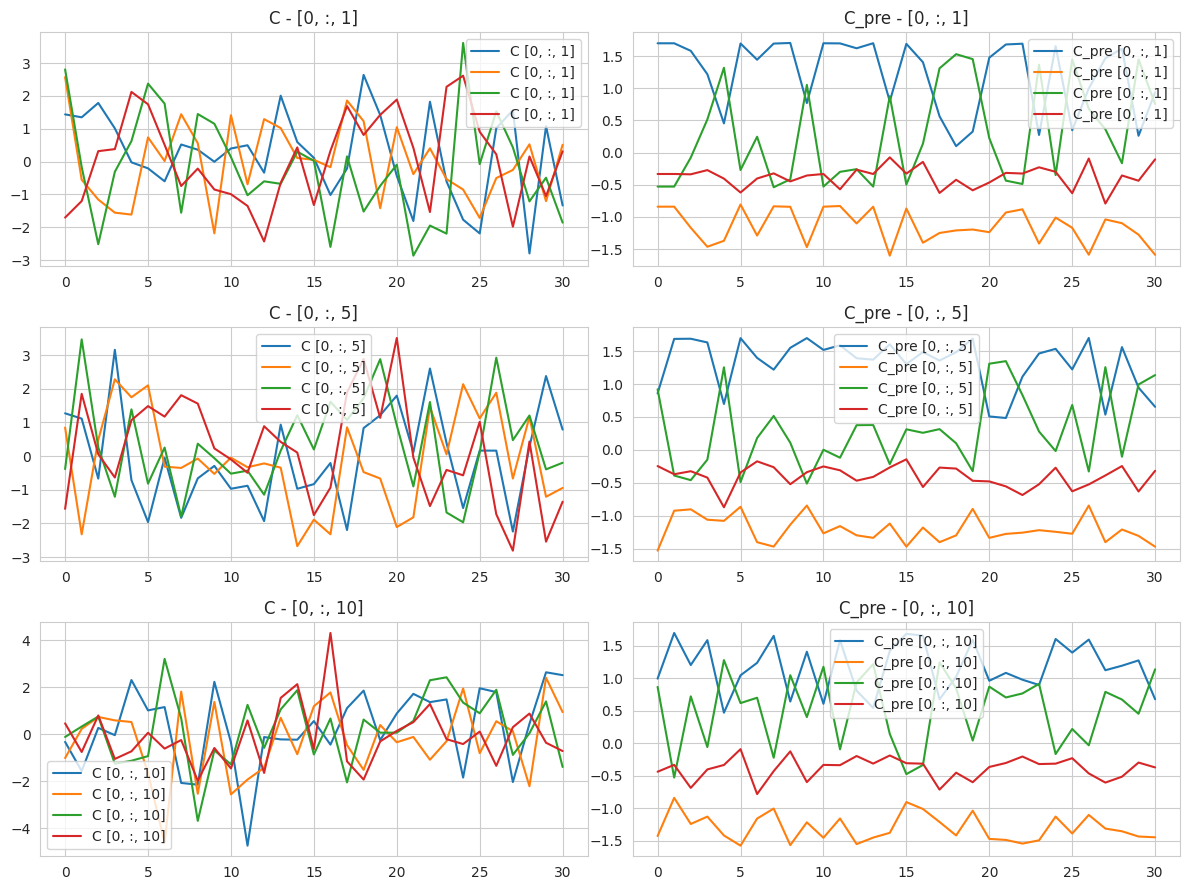

In [2]:
# 画系数C
C, C_pre = result['C'], result['C_pre']
fig_C, axes_C = plt.subplots(nrows=3, ncols=2, figsize=(12, 9))

cols_to_plot = [1, 5, 10]
for i, col in enumerate(cols_to_plot):
    axes_C[i, 0].plot(C[1:128, col].cpu().detach().numpy(), label=f'C [0, :, {col}]')
    axes_C[i, 0].grid(True)
    axes_C[i, 0].set_title(f'C - [0, :, {col}]')
    axes_C[i, 0].legend()

    axes_C[i, 1].plot(C_pre[1:128, col].cpu().detach().numpy(), label=f'C_pre [0, :, {col}]')
    axes_C[i, 1].grid(True)
    axes_C[i, 1].set_title(f'C_pre - [0, :, {col}]')
    axes_C[i, 1].legend()

plt.tight_layout()
plt.show()

In [4]:
# 画A
import matplotlib.pyplot as plt
import seaborn as sns

# 创建热力图
plt.figure(figsize=(8, 6))  # 设置图像大小
sns.heatmap(A, cmap="viridis", annot=False, cbar=True)

# 设置标题
plt.title("Heatmap of A Matrix")
plt.xlabel("Nodes")
plt.ylabel("Nodes")

# 显示图像
print('sum(A): ', np.sum(A))
plt.show()

NameError: name 'A' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
# 查看提取函数
import torch
from models.MyWAT import SigmoidDiffWindow2D
import matplotlib.pyplot as plt

x = torch.ones(4,256)
sigmoid_func = SigmoidDiffWindow2D(K = 4, L = 128)
y = sigmoid_func(x)

print("sigmoid_func.start_idx shape: ", sigmoid_func.start_idx.shape)
print("sigmoid_func.start_idx elements: ", sigmoid_func.start_idx)

# plt.plot(sigmoid_func.window[0,:],marker='o',linestyle='-',color='r')
# plt.show()

fig_S, axes_S = plt.subplots(nrows=4, figsize=(12, 9))
cols_to_plot = [0,1,2,3]
for i, col in enumerate(cols_to_plot):
    axes_S[i].plot(sigmoid_func.window[col,:], label = f'{col}')
    axes_S[i].grid(True)
    axes_S[i].set_title(f'SigmoidDiffWindow2D [{col}, :]')
plt.tight_layout()
plt.show()